# Ignore Sample Code

In [1]:
from torch.optim import AdamW
from video_transformers import VideoModel
from video_transformers.backbones.transformers import TransformersBackbone
from video_transformers.data import VideoDataModule
from video_transformers.heads import LinearHead
from video_transformers.trainer import trainer_factory
from video_transformers.utils.file import download_ucf6

backbone = TransformersBackbone("facebook/timesformer-base-finetuned-k400", num_unfrozen_stages=1)

download_ucf6("./")
datamodule = VideoDataModule(
    train_root="ucf6/train",
    val_root="ucf6/val",
    batch_size=4,
    num_workers=4,
    num_timesteps=8,
    preprocess_input_size=224,
    preprocess_clip_duration=1,
    preprocess_means=backbone.mean,
    preprocess_stds=backbone.std,
    preprocess_min_short_side=256,
    preprocess_max_short_side=320,
    preprocess_horizontal_flip_p=0.5,
)

head = LinearHead(hidden_size=backbone.num_features, num_classes=datamodule.num_classes)
model = VideoModel(backbone, head)

optimizer = AdamW(model.parameters(), lr=1e-4)

Trainer = trainer_factory("single_label_classification")
trainer = Trainer(datamodule, model, optimizer=optimizer, max_epochs=8)

hello, hello_again = trainer.fit()

/home/vihaan/anaconda3/envs/god/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at facebook/timesformer-base-finetuned-k400 were not used when initializing TimesformerModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TimesformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TimesformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/vihaan/anaconda3/envs/god/lib/python3.8/site-packages/transformers/models/videomae/feature

ucf6.zip already exists. Skipping download.
3 is called
4 is called
3 is called
4 is called
3 is called
4 is called
Trainable parameteres: 10048518
Total parameteres: 121263366


Epoch 0 (Train):  15%|█▌        | 27/180 [00:20<01:55,  1.33 batch/s, loss=1.8382]


KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt

def plot_loss_curves(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# TimeSFormer

In [1]:
from torch.optim import AdamW
from video_transformers import VideoModel
from video_transformers.backbones.transformers import TransformersBackbone
from video_transformers.data import VideoDataModule
from video_transformers.heads import LinearHead
from video_transformers.trainer import trainer_factory
from video_transformers.utils.file import download_ucf6

backbone = TransformersBackbone("facebook/timesformer-base-finetuned-k400", num_unfrozen_stages=1)

datamodule = VideoDataModule(
    train_root="final_datasets/second_iter/train",
    val_root="final_datasets/second_iter/val",
    batch_size=4,
    num_workers=4,
    num_timesteps=8,
    preprocess_input_size=224,
    preprocess_clip_duration=1,
    preprocess_means=backbone.mean,
    preprocess_stds=backbone.std,
    preprocess_min_short_side=256,
    preprocess_max_short_side=320,
    preprocess_horizontal_flip_p=0.5,
)

head = LinearHead(hidden_size=backbone.num_features, num_classes=datamodule.num_classes)
model = VideoModel(backbone, head)

optimizer = AdamW(model.parameters(), lr=1e-4)

Trainer = trainer_factory("single_label_classification")
trainer = Trainer(datamodule, model, optimizer=optimizer, max_epochs=8)

train_losses, val_losses = trainer.fit()

/home/vihaan/anaconda3/envs/god/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at facebook/timesformer-base-finetuned-k400 were not used when initializing TimesformerModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing TimesformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TimesformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/vihaan/anaconda3/envs/god/lib/python3.8/site-packages/transformers/models/videomae/feature

3 is called
4 is called
3 is called
4 is called
3 is called
4 is called
Trainable parameteres: 10050825
Total parameteres: 121265673


Epoch 7 (Done) : 100%|██████████| 175/175 [05:25<00:00,  1.86s/ batch, Train Loss=0.0875, Val Loss=0.8270, val/f1=0.817, train/f1=0.973]


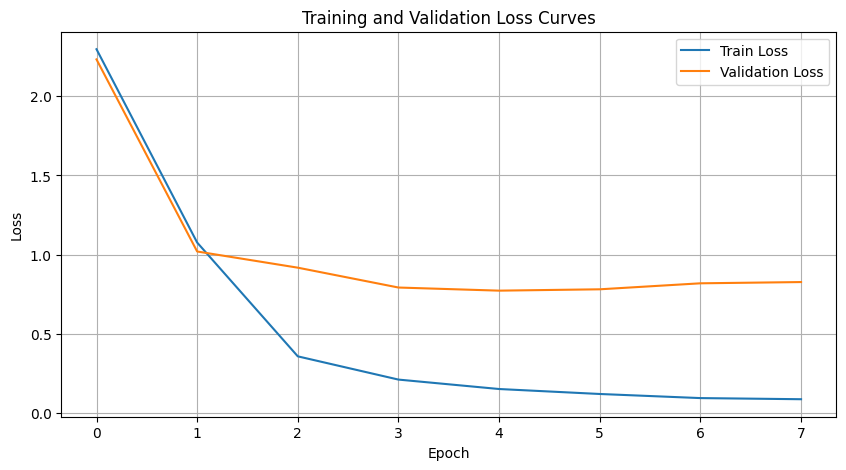

Timesformer Train/Val Losses
[2.296381950378418, 1.076368808746338, 0.35810211300849915, 0.21144196391105652, 0.15191730856895447, 0.12058132886886597, 0.09469017386436462, 0.0875382348895073]
[2.2320804595947266, 1.019836187362671, 0.9177058935165405, 0.792421281337738, 0.7727484107017517, 0.7812417149543762, 0.8190663456916809, 0.8269510269165039]


In [5]:
train_losses_cpu = [loss.detach().cpu().item() for loss in train_losses]
val_losses_cpu = [loss.detach().cpu().item() for loss in val_losses]

plot_loss_curves(train_losses_cpu, val_losses_cpu)

print("Timesformer Train/Val Losses")
print(train_losses_cpu)
print(val_losses_cpu)


# ConVNeXT + Transformer

In [2]:
from torch.optim import AdamW
from video_transformers import TimeDistributed, VideoModel
from video_transformers.backbones.transformers import TransformersBackbone
from video_transformers.data import VideoDataModule
from video_transformers.heads import LinearHead
from video_transformers.necks import TransformerNeck
from video_transformers.trainer import trainer_factory
from video_transformers.utils.file import download_ucf6

backbone = TimeDistributed(TransformersBackbone("facebook/convnext-small-224", num_unfrozen_stages=1))
neck = TransformerNeck(
    num_features=backbone.num_features,
    num_timesteps=8,
    transformer_enc_num_heads=4,
    transformer_enc_num_layers=2,
)

datamodule = VideoDataModule(
    train_root="final_datasets/second_iter/train",
    val_root="final_datasets/second_iter/val",
    batch_size=4,
    num_workers=4,
    num_timesteps=8,
    preprocess_input_size=224,
    preprocess_clip_duration=1,
    preprocess_means=backbone.mean,
    preprocess_stds=backbone.std,
    preprocess_min_short_side=256,
    preprocess_max_short_side=320,
    preprocess_horizontal_flip_p=0.5,
)

head = LinearHead(hidden_size=neck.num_features, num_classes=datamodule.num_classes)
model = VideoModel(backbone, head, neck)

optimizer = AdamW(model.parameters(), lr=1e-4)

Trainer = trainer_factory("single_label_classification")
trainer = Trainer(
    datamodule,
    model,
    optimizer=optimizer,
    max_epochs=8
)

train_losses, val_losses = trainer.fit()


Some weights of the model checkpoint at facebook/convnext-small-224 were not used when initializing ConvNextModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ConvNextModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ConvNextModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/vihaan/anaconda3/envs/god/lib/python3.8/site-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


3 is called
4 is called
3 is called
4 is called
3 is called
4 is called
Trainable parameteres: 16550409
Total parameteres: 66003561


Epoch 7 (Done) : 100%|██████████| 175/175 [02:17<00:00,  1.27 batch/s, Train Loss=0.1073, Val Loss=0.9585, val/f1=0.808, train/f1=0.964]


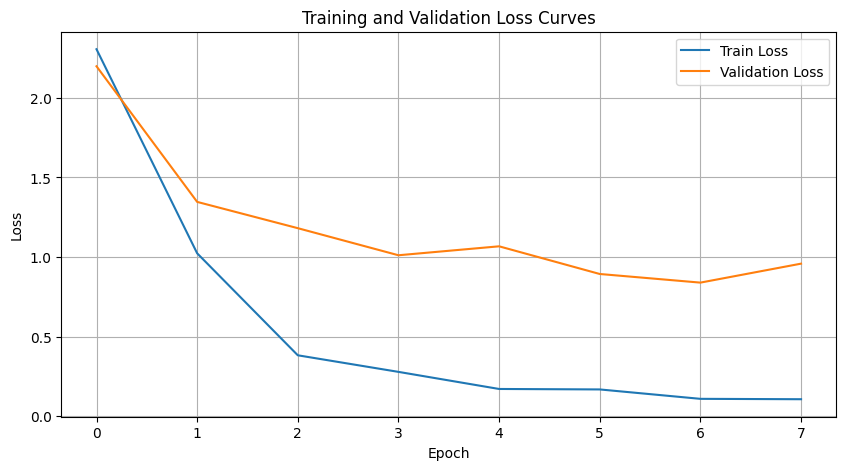

Timesformer Train/Val Losses
[2.3048713207244873, 1.0235066413879395, 0.3830922842025757, 0.2789866626262665, 0.17163102328777313, 0.16872207820415497, 0.10969364643096924, 0.10727523267269135]
[2.1978116035461426, 1.3462679386138916, 1.1812350749969482, 1.0112119913101196, 1.0673540830612183, 0.8935621380805969, 0.8394209742546082, 0.9584826231002808]


In [5]:
train_losses_cpu = [loss.detach().cpu().item() for loss in train_losses]
val_losses_cpu = [loss.detach().cpu().item() for loss in val_losses]

plot_loss_curves(train_losses_cpu, val_losses_cpu)

print("Timesformer Train/Val Losses")
print(train_losses_cpu)
print(val_losses_cpu)


# Resnet + GRU

In [6]:
from video_transformers import TimeDistributed, VideoModel
from video_transformers.backbones.transformers import TransformersBackbone
from video_transformers.data import VideoDataModule
from video_transformers.heads import LinearHead
from video_transformers.necks import GRUNeck
from video_transformers.trainer import trainer_factory
from video_transformers.utils.file import download_ucf6

backbone = TimeDistributed(TransformersBackbone("microsoft/resnet-18", num_unfrozen_stages=1))
neck = GRUNeck(num_features=backbone.num_features, hidden_size=128, num_layers=2, return_last=True)

download_ucf6("./")
datamodule = VideoDataModule(
    train_root="final_datasets/second_iter/train",
    val_root="final_datasets/second_iter/val",
    batch_size=4,
    num_workers=4,
    num_timesteps=8,
    preprocess_input_size=224,
    preprocess_clip_duration=1,
    preprocess_means=backbone.mean,
    preprocess_stds=backbone.std,
    preprocess_min_short_side=256,
    preprocess_max_short_side=320,
    preprocess_horizontal_flip_p=0.5,
)

head = LinearHead(hidden_size=neck.hidden_size, num_classes=datamodule.num_classes)
model = VideoModel(backbone, head, neck)

Trainer = trainer_factory("single_label_classification")
trainer = Trainer(
    datamodule,
    model,
    max_epochs=8
)

train_losses, val_losses = trainer.fit()

Some weights of the model checkpoint at microsoft/resnet-18 were not used when initializing ResNetModel: ['classifier.1.bias', 'classifier.1.weight']
- This IS expected if you are initializing ResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/vihaan/anaconda3/envs/god/lib/python3.8/site-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


ucf6.zip already exists. Skipping download.
3 is called
4 is called
3 is called
4 is called
3 is called
4 is called
Trainable parameteres: 8740489
Total parameteres: 11523273


Epoch 7 (Done) : 100%|██████████| 175/175 [02:10<00:00,  1.34 batch/s, Train Loss=0.3005, Val Loss=0.7834, val/f1=0.804, train/f1=0.939]


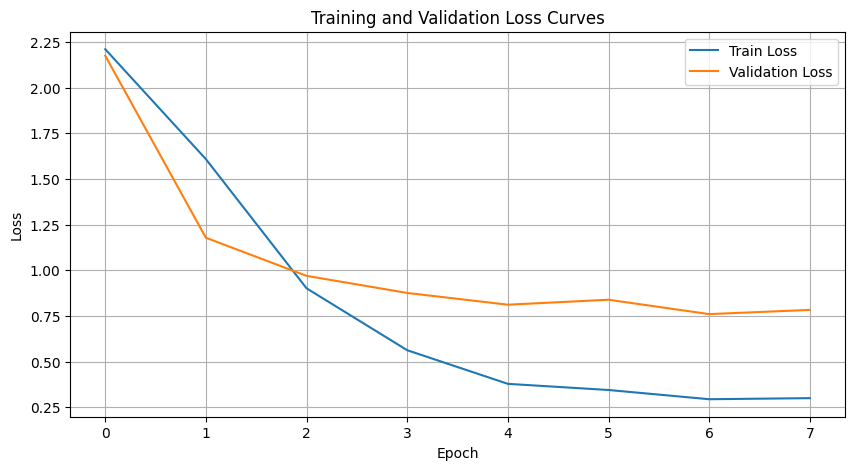

Timesformer Train/Val Losses
[2.210066556930542, 1.6084338426589966, 0.9016364812850952, 0.5628388524055481, 0.3787430226802826, 0.3451032042503357, 0.29460206627845764, 0.300479918718338]
[2.1744399070739746, 1.1782349348068237, 0.9697585701942444, 0.8762503862380981, 0.8118908405303955, 0.839084804058075, 0.7604119181632996, 0.7833609580993652]


In [7]:
train_losses_cpu = [loss.detach().cpu().item() for loss in train_losses]
val_losses_cpu = [loss.detach().cpu().item() for loss in val_losses]

plot_loss_curves(train_losses_cpu, val_losses_cpu)

print("Timesformer Train/Val Losses")
print(train_losses_cpu)
print(val_losses_cpu)
